In [ ]:
from html.parser import incomplete
!pip install colorblind-friendly


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data/curriculum_evaluation_results.csv')

# List of possible groupings
groupings = [
    'complexity',
    'grammar',
    'reward_type',
    'evaluated_env',
    'instruction_type',
    ['complexity', 'grammar'],
    ['complexity'],
    ['complexity', 'evaluated_env'],
    ['grammar', 'reward_type'],
    ['grammar', 'evaluated_env'],
    ['reward_type', 'evaluated_env'],
    ['complexity', 'grammar', 'reward_type'],
    ['complexity', 'grammar', 'evaluated_env'],
    ['complexity', 'reward_type', 'evaluated_env'],
    ['grammar', 'reward_type', 'evaluated_env'],
]

# Iterate through different groupings and plot
for group in groupings:
    grouped = data.groupby(group)['average_success_rate'].mean()

    plt.figure(figsize=(12, 6))
    grouped.plot(kind='bar', color=['blue'])
    plt.ylabel('Average Success Rate')
    plt.title(f'Comparison of Trained Agents by {group} of Testing Environments')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.legend(['Trained Agents'])
    # save in data\Figures folder
    plt.savefig(f'data/Figures/{group}_comparison.jpg', dpi=300)
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/curriculum_evaluation_results.csv')

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(data['complexity'], bins=data['complexity'].nunique(), edgecolor='black')
plt.xlabel('Complexity Category')
plt.ylabel('Number of Environments')
plt.title('Distribution of Environments by Complexity')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('data/curriculum_evaluation_results.csv')

# Calculate overall average success rates
trained_avg_success = data['average_success_rate'].mean()
random_avg_success = data['random_agent_average_success_rate'].mean()

# Print the results
print(f"Overall Average Success Rate (Trained Agents): {trained_avg_success:.5f}")
print(f"Overall Average Success Rate (Random Agents): {random_avg_success:.5f}")

# Calculate and print the percentage improvement
improvement = (trained_avg_success - random_avg_success) / random_avg_success * 100
print(f"Percentage Improvement of Trained Agents over Random Agents: {improvement:.2f}%")

In [ ]:
import matplotlib.pyplot as plt

# Data
agent_types = ['Trained Agents', 'Random Agents']
success_rates = [0.45922, 0.00131]

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(agent_types, success_rates, color=['steelblue', 'salmon'],width=0.5)

# Use logarithmic scale for the y-axis
plt.yscale('log')

# Add value labels on top of the bars
for bar, rate in zip(bars, success_rates):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        rate,
        f'{rate * 100:.2f}%',
        ha='center',
        va='bottom',
        fontsize=12
    )

# Titles and labels
plt.title('Overall Average Success Rate Comparison', fontsize=16)
plt.ylabel('Success Rate (log scale)', fontsize=14)
plt.xlabel('Agent Type', fontsize=14)
plt.tight_layout()

plt.savefig('success_rate_comparison.png', dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

approach_types = ['sparse', 'step_cost']
# calculate the average success rate for each approach
success_rates = data.groupby('reward_type')['average_success_rate'].mean()

# Create the log scale bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(approach_types, success_rates, color=['steelblue', 'salmon'],width=0.5)

# Use logarithmic scale for the y-axis
plt.yscale('log')

# Add value labels on top of the bars
for bar, rate in zip(bars, success_rates):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        rate,
        f'{rate * 100:.2f}%',
        ha='center',
        va='bottom',
        fontsize=12
    )

# Titles and labels
plt.title('Average Success Rate by Reward Type', fontsize=16)
plt.ylabel('Success Rate (log scale)', fontsize=14)
plt.xlabel('Reward Type', fontsize=14)
plt.tight_layout()
plt.savefig('success_rate_by_reward_type.jpg', dpi=300)
plt.show()




In [ ]:
import matplotlib.pyplot as plt

# draw the chart for the average success rate by envorinment type 'seen' and 'unseen'

# calculate the average success rate for each approach
success_rates = data.groupby('evaluated_env')['average_success_rate'].mean()

# Create the log scale bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(['seen', 'unseen'], success_rates, color=['steelblue', 'salmon'],width=0.5)



# Add value labels on top of the bars
for bar, rate in zip(bars, success_rates):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        rate,
        f'{rate * 100:.2f}%',
        ha='center',
        va='bottom',
        fontsize=12
    )

# Titles and labels
plt.title('Average Success Rate by Evaluated Environment', fontsize=16)
plt.ylabel('Success Rate (log scale)', fontsize=14)
plt.xlabel('Evaluated Environment', fontsize=14)
plt.tight_layout()
plt.savefig('success_rate_by_evaluated_env.jpg', dpi=300)
plt.show()


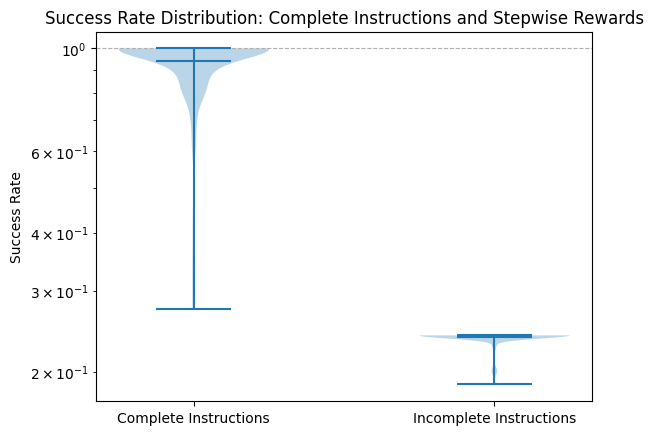

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('data/curriculum_evaluation_results.csv')
# Creating subsets for complete and incomplete instructions for both trained and random agents
complete_trained_success = df[df['instruction_type'] == 'complete']['average_success_rate']
# filter again fir (for only step_cost reward type)
complete_trained_success = df[(df['instruction_type'] == 'complete') & (df['reward_type'] == 'step_cost')]['average_success_rate']
incomplete_trained_success = df[(df['instruction_type'] == 'incomplete') & (df['reward_type'] == 'step_cost')]['average_success_rate']

# Plotting the violin plot
plt.violinplot([complete_trained_success, incomplete_trained_success], showmeans=True)
plt.xticks([1, 2], ['Complete Instructions', 'Incomplete Instructions'])
plt.ylabel('Success Rate')
# y log scale
plt.yscale('log')
plt.title('Success Rate Distribution: Complete Instructions and Stepwise Rewards')
plt.grid(axis='y', linestyle='--')

# Displaying the plot
plt.savefig('success_rate_distribution.jpg', dpi=300)
plt.show()


In [ ]:
# draw violin plot for sparse reward type vs step_cost reward type
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/curriculum_evaluation_results.csv')
# Creating subsets for complete and incomplete instructions for both trained and random agents
sparse_trained_success = df[(df['reward_type'] == 'sparse') & (df['instruction_type'] == 'complete')]['average_success_rate']
step_cost_trained_success = df[(df['reward_type'] == 'step_cost') & (df['instruction_type'] == 'complete')]['average_success_rate']

# Plotting the violin plot
plt.violinplot([sparse_trained_success, step_cost_trained_success], showmeans=True)
plt.xticks([1, 2], ['Sparse Reward', 'Step Cost Reward'])
plt.ylabel('Success Rate')
plt.title('Success Rate Distribution: Complete Instructions and Different Reward Types')
plt.grid(axis='y', linestyle='--')

# Displaying the plot
plt.savefig('success_rate_distribution_reward_type.jpg', dpi=300)
plt.show()